In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q "/content/drive/MyDrive/Pothole.zip" -d "/content/Pothole_data"

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [7]:
data_yaml = """
path: /content/Pothole_data/Pothole
train: /content/Pothole_data/Pothole/train
val: /content/Pothole_data/Pothole/val

nc: 1
names: ['pothole']
"""
with open("data.yaml", "w") as f:
    f.write(data_yaml)

In [9]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")
model.train(
    data="data.yaml",
    epochs=40,
    batch=16,
    imgsz=640,
    name="Pothole_detection"
)

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Pothole_detection3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True,

train: Scanning /content/Pothole_data/Pothole/train/labels.cache... 2732 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2732/2732 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 469.9±91.2 MB/s, size: 69.5 KB)


val: Scanning /content/Pothole_data/Pothole/val/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]


Plotting labels to runs/detect/Pothole_detection3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/Pothole_detection3
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      6.75G      1.893      2.319      1.975         47        640: 100%|██████████| 171/171 [01:36<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         16         25      0.555       0.56      0.466      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      6.75G      1.973      2.327      2.063         56        640: 100%|██████████| 171/171 [01:33<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         16         25      0.417       0.32       0.27      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      6.81G      1.917      2.289      2.021         52        640: 100%|██████████| 171/171 [01:33<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         16         25      0.914      0.426      0.522      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40       6.9G      1.861      2.119       1.94         49        640: 100%|██████████| 171/171 [01:33<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         16         25      0.727       0.56      0.552      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      6.99G      1.798      2.014      1.893         30        640: 100%|██████████| 171/171 [01:32<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         16         25      0.607        0.6      0.506      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40       7.1G      1.781      1.998      1.879         31        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         16         25       0.69       0.56      0.554      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40       7.1G      1.724      1.872      1.834         40        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         16         25      0.817      0.716      0.785      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40       7.1G      1.701      1.816      1.822         44        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         16         25      0.466       0.68      0.572      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      7.21G      1.675      1.767      1.796         43        640: 100%|██████████| 171/171 [01:33<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         16         25      0.712      0.593      0.636      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      7.21G       1.67      1.726      1.789         38        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         16         25      0.755       0.56      0.521      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      7.21G      1.631      1.653      1.767         34        640: 100%|██████████| 171/171 [01:31<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         16         25      0.599       0.68      0.545      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      7.21G      1.615      1.619      1.737         39        640: 100%|██████████| 171/171 [01:33<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         16         25      0.553       0.52      0.549      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      7.21G      1.585      1.591      1.723         42        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         16         25      0.741       0.56       0.58      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      7.21G      1.592      1.575      1.725         53        640: 100%|██████████| 171/171 [01:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         16         25       0.69       0.56      0.623      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      7.21G       1.58       1.55      1.708         32        640: 100%|██████████| 171/171 [01:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         16         25      0.721       0.64      0.659       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      7.21G      1.541      1.523      1.691         38        640: 100%|██████████| 171/171 [01:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         16         25      0.761      0.638      0.664      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      7.21G      1.531      1.483      1.685         63        640: 100%|██████████| 171/171 [01:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         16         25      0.856      0.715      0.745      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      7.21G      1.535       1.46       1.68         66        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         16         25      0.841      0.635      0.642      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      7.22G      1.497      1.425      1.661         53        640: 100%|██████████| 171/171 [01:31<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         16         25      0.696        0.6      0.589      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      7.22G      1.528      1.435      1.677         58        640: 100%|██████████| 171/171 [01:31<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         16         25      0.849        0.6      0.698       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      7.22G      1.472      1.389      1.638         52        640: 100%|██████████| 171/171 [01:31<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         16         25      0.506      0.574       0.48      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      7.22G      1.458      1.359      1.636         31        640: 100%|██████████| 171/171 [01:31<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         16         25      0.791       0.64      0.659      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      7.22G      1.457      1.353      1.637         48        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         16         25      0.772        0.6      0.636      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      7.22G      1.452      1.336      1.614         50        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         16         25      0.734       0.68      0.624      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      7.22G       1.43        1.3       1.62         47        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         16         25      0.672      0.655      0.635      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      7.22G      1.422      1.281      1.609         56        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         16         25      0.832       0.72       0.74      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      7.22G      1.409       1.25      1.589         54        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         16         25      0.748       0.68      0.683      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      7.31G        1.4      1.252      1.586         41        640: 100%|██████████| 171/171 [01:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         16         25      0.698       0.68      0.607        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      7.31G      1.391       1.22      1.579         41        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         16         25      0.972       0.68      0.781      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      7.31G      1.381      1.186      1.571         47        640: 100%|██████████| 171/171 [01:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         16         25        0.8       0.68       0.68      0.461


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      7.31G      1.372      1.068      1.609         19        640: 100%|██████████| 171/171 [01:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         16         25       0.62       0.76      0.728      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      7.31G      1.342      1.019      1.593         37        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         16         25      0.735       0.68      0.693      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      7.31G      1.324     0.9867      1.578         22        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         16         25      0.721       0.68      0.632      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      7.31G      1.297     0.9632       1.56         32        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         16         25      0.647       0.68      0.581       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      7.31G      1.289     0.9299      1.545         22        640: 100%|██████████| 171/171 [01:31<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         16         25       0.73       0.68      0.638      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      7.31G       1.26      0.916       1.53         28        640: 100%|██████████| 171/171 [01:31<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         16         25      0.696       0.68      0.672      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      7.35G      1.252     0.8759      1.519         22        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         16         25      0.698       0.68      0.583      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      7.35G      1.225     0.8609      1.491         32        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         16         25      0.744       0.68      0.639      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      7.35G      1.208     0.8336      1.478         19        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         16         25       0.73       0.68        0.6      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      7.35G      1.194     0.8141      1.468         23        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         16         25      0.714       0.68        0.6      0.422



40 epochs completed in 1.042 hours.
Optimizer stripped from runs/detect/Pothole_detection3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/Pothole_detection3/weights/best.pt, 52.0MB

Validating runs/detect/Pothole_detection3/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


                   all         16         25      0.972       0.68      0.781      0.535
Speed: 0.2ms preprocess, 13.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/Pothole_detection3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab72600de50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [11]:
!zip -r /content/model.zip /content/runs/detect/Pothole_detection3

  adding: content/runs/detect/Pothole_detection3/ (stored 0%)
  adding: content/runs/detect/Pothole_detection3/train_batch5132.jpg (deflated 3%)
  adding: content/runs/detect/Pothole_detection3/labels_correlogram.jpg (deflated 35%)
  adding: content/runs/detect/Pothole_detection3/results.png (deflated 6%)
  adding: content/runs/detect/Pothole_detection3/results.csv (deflated 59%)
  adding: content/runs/detect/Pothole_detection3/confusion_matrix_normalized.png (deflated 36%)
  adding: content/runs/detect/Pothole_detection3/BoxP_curve.png (deflated 15%)
  adding: content/runs/detect/Pothole_detection3/BoxF1_curve.png (deflated 14%)
  adding: content/runs/detect/Pothole_detection3/train_batch5130.jpg (deflated 4%)
  adding: content/runs/detect/Pothole_detection3/args.yaml (deflated 53%)
  adding: content/runs/detect/Pothole_detection3/train_batch0.jpg (deflated 1%)
  adding: content/runs/detect/Pothole_detection3/confusion_matrix.png (deflated 37%)
  adding: content/runs/detect/Pothole_de


image 1/1 /content/test.png: 448x640 2 potholes, 40.6ms
Speed: 2.6ms preprocess, 40.6ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


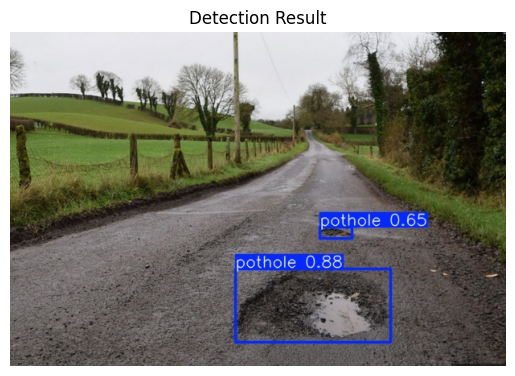

In [13]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

model = YOLO('/content/runs/detect/Pothole_detection3/weights/best.pt')
results = model('/content/test.png')

results[0].save(filename="result.jpg")

img = Image.open("result.jpg")
plt.imshow(img)
plt.axis('off')
plt.title("Detection Result")
plt.show()
